In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
import networkx as nx

def generate_tree(n, b):
    """
    Generates a tree graph with n nodes and branching factor b.
    
    Parameters:
    - n: Total number of nodes.
    - b: Branching factor.

    Returns:
    - G: A networkx graph.
    """
    if n < 1:
        raise ValueError("The number of nodes, n, should be at least 1.")
    if b < 1:
        raise ValueError("The branching factor, b, should be at least 1.")

    G = nx.Graph()
    node_counter = 1
    queue = [(0, 0)]  # (node, depth)
    
    while queue and node_counter < n:
        current_node, depth = queue.pop(0)
        for i in range(b):
            if node_counter >= n:
                break
            child_node = node_counter
            G.add_edge(current_node, child_node)
            queue.append((child_node, depth + 1))
            node_counter += 1

    return G

In [11]:
def load_data(folder_name):
    datapath = f"../data/{folder_name}/results.csv"
    data = pd.read_csv(datapath)
    return data

def preprocess_data(data):
    # Filter the dataframe to include only the first adoption instance of each story item by each agent across all trials
    all_trials_adopted = data[data['adopted'] == True].sort_values(by='timestep').drop_duplicates(subset=['Trial', 'agent', 'story_item'], keep='first')

    # Calculate the average time taken to adopt each story item across all trials, based on the first adoption instance
    average_time_all_trials = all_trials_adopted.groupby(['Trial', 'story_item'])['timestep'].mean().reset_index()

    # Now calculate the overall average for each story item across all trials
    overall_average_time = average_time_all_trials.groupby('story_item')['timestep'].mean().reset_index()
    
    return overall_average_time

folders = [
    "linear_10stories", "linear_20stories", "linear_30stories",
    "binary_10stories", "binary_20stories", "binary_30stories",
    "ternary_10stories", "ternary_20stories", "ternary_30stories"
]

for folder in folders:
    variable_name = f"data_{folder}"  # Construct the variable name for the loaded data
    preprocessed_variable_name = f"preprocessed_{folder}"  # Construct the variable name for the preprocessed data
    loaded_data = load_data(folder)  # Load the data
    globals()[preprocessed_variable_name] = preprocess_data(loaded_data)  # Preprocess and assign to a dynamically named variable


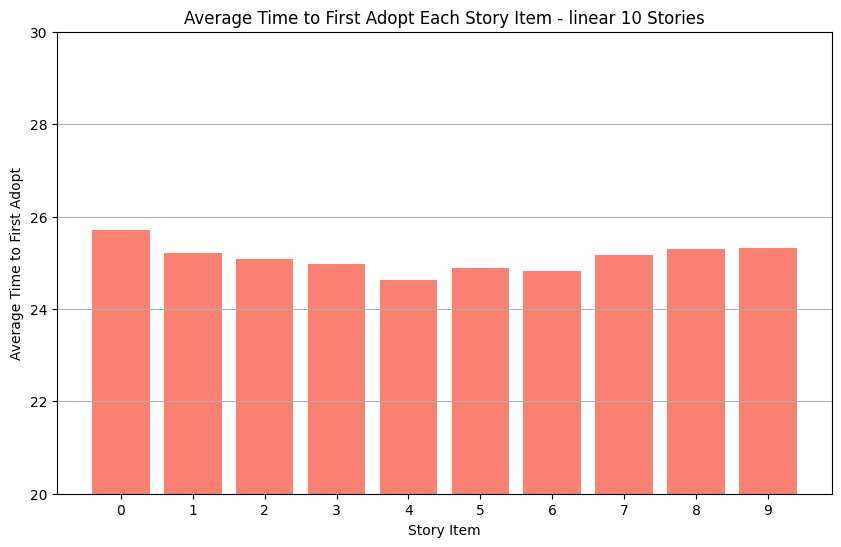

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(preprocessed_linear_10stories['story_item'], preprocessed_linear_10stories['timestep'], color='salmon')
plt.xlabel('Story Item')
plt.ylabel('Average Time to First Adopt')
plt.title('Average Time to First Adopt Each Story Item - linear 10 Stories')
plt.xticks(preprocessed_linear_10stories['story_item'])
plt.grid(axis='y')
plt.ylim(20, 30)

plt.show()

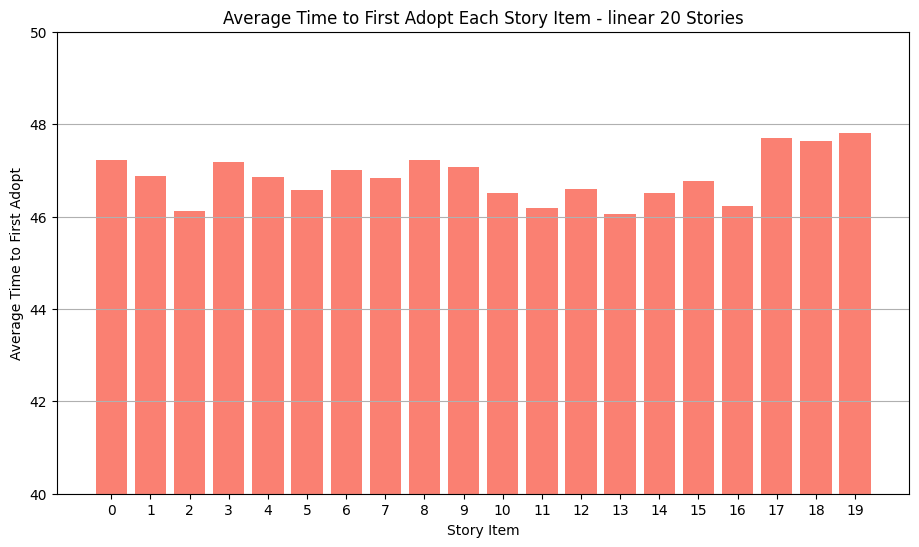

In [24]:
plt.figure(figsize=(11, 6))
plt.bar(preprocessed_linear_20stories['story_item'], preprocessed_linear_20stories['timestep'], color='salmon')
plt.xlabel('Story Item')
plt.ylabel('Average Time to First Adopt')
plt.title('Average Time to First Adopt Each Story Item - linear 20 Stories')
plt.xticks(preprocessed_linear_20stories['story_item'])
plt.grid(axis='y')
plt.ylim(40, 50)

plt.show()

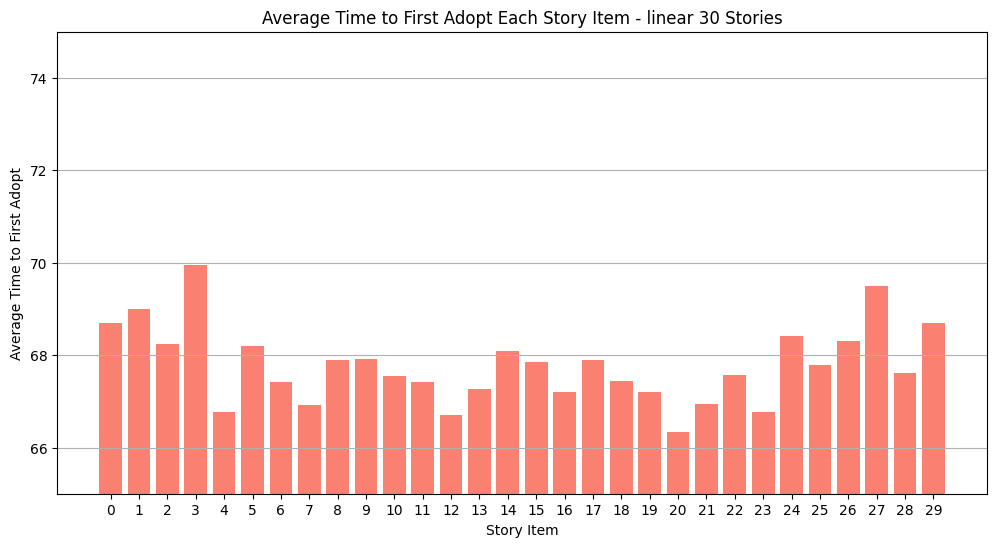

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(preprocessed_linear_30stories['story_item'], preprocessed_linear_30stories['timestep'], color='salmon')
plt.xlabel('Story Item')
plt.ylabel('Average Time to First Adopt')
plt.title('Average Time to First Adopt Each Story Item - linear 30 Stories')
plt.xticks(preprocessed_linear_30stories['story_item'])
plt.grid(axis='y')
plt.ylim(65, 75)

plt.show()

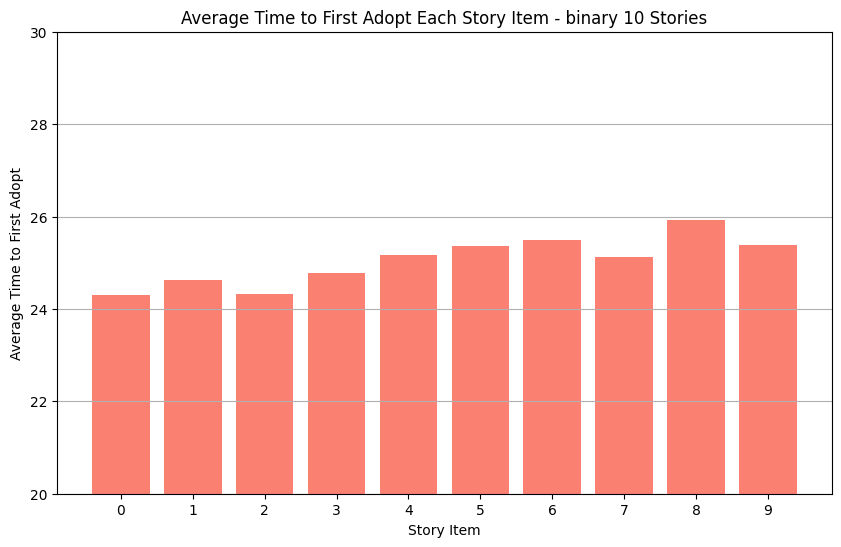

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(preprocessed_binary_10stories['story_item'], preprocessed_binary_10stories['timestep'], color='salmon')
plt.xlabel('Story Item')
plt.ylabel('Average Time to First Adopt')
plt.title('Average Time to First Adopt Each Story Item - binary 10 Stories')
plt.xticks(preprocessed_binary_10stories['story_item'])
plt.grid(axis='y')
plt.ylim(20, 30)

plt.show()

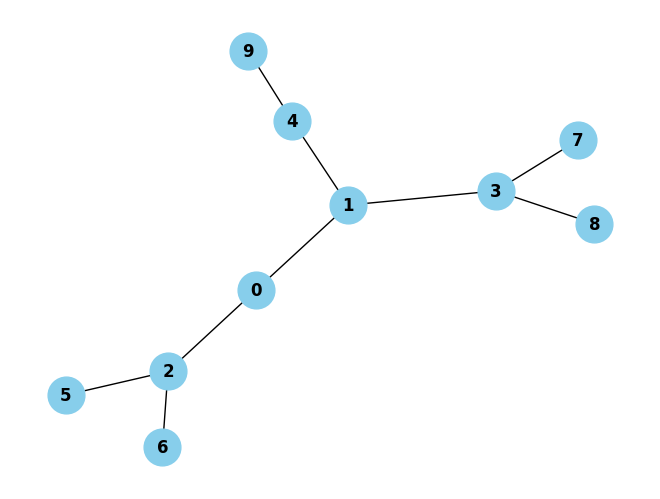

In [26]:
G = generate_tree(10, 2)
nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold')
plt.show()

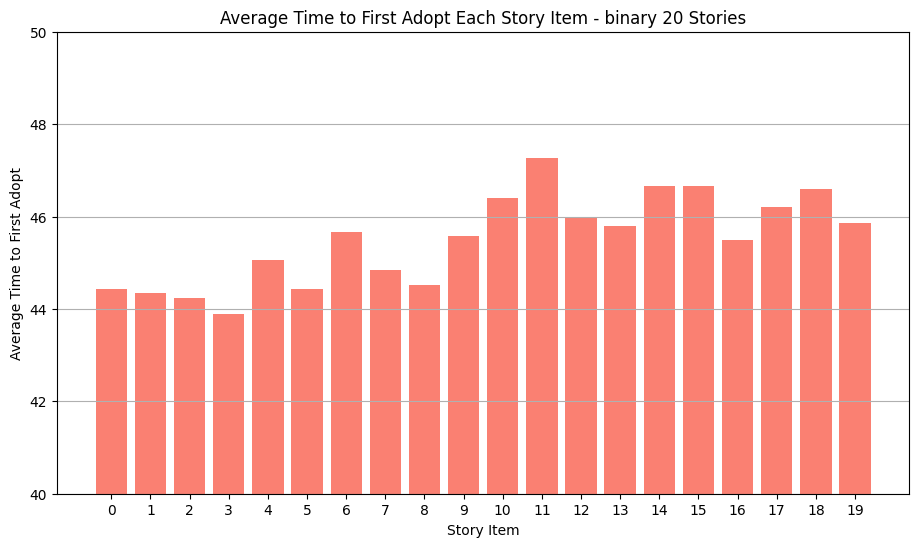

In [30]:
plt.figure(figsize=(11, 6))
plt.bar(preprocessed_binary_20stories['story_item'], preprocessed_binary_20stories['timestep'], color='salmon')
plt.xlabel('Story Item')
plt.ylabel('Average Time to First Adopt')
plt.title('Average Time to First Adopt Each Story Item - binary 20 Stories')
plt.xticks(preprocessed_binary_20stories['story_item'])
plt.grid(axis='y')
plt.ylim(40, 50)

plt.show()

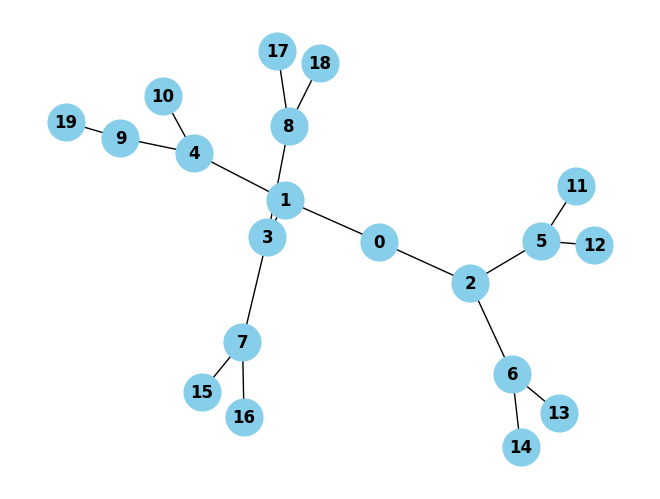

In [31]:
G = generate_tree(20, 2)
nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold')
plt.show()

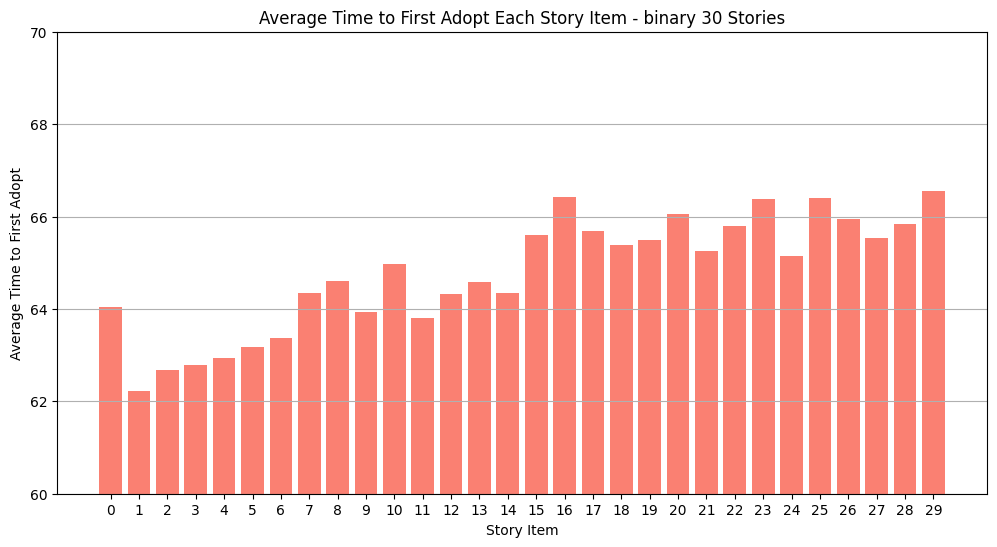

In [33]:
plt.figure(figsize=(12, 6))
plt.bar(preprocessed_binary_30stories['story_item'], preprocessed_binary_30stories['timestep'], color='salmon')
plt.xlabel('Story Item')
plt.ylabel('Average Time to First Adopt')
plt.title('Average Time to First Adopt Each Story Item - binary 30 Stories')
plt.xticks(preprocessed_binary_30stories['story_item'])
plt.grid(axis='y')
plt.ylim(60, 70)

plt.show()

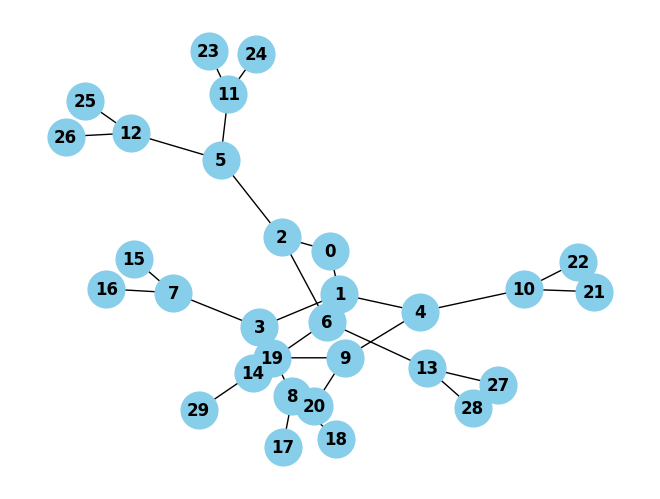

In [36]:
G = generate_tree(30, 2)
nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold')
plt.show()

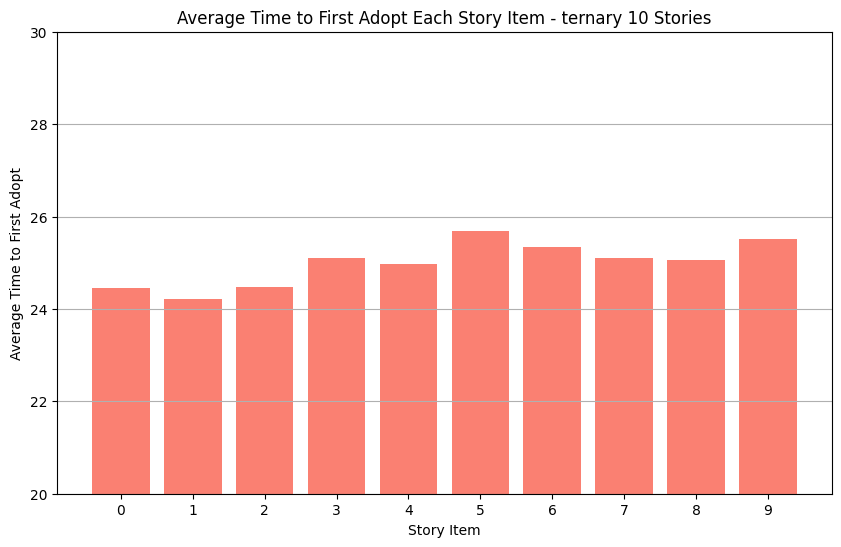

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(preprocessed_ternary_10stories['story_item'], preprocessed_ternary_10stories['timestep'], color='salmon')
plt.xlabel('Story Item')
plt.ylabel('Average Time to First Adopt')
plt.title('Average Time to First Adopt Each Story Item - ternary 10 Stories')
plt.xticks(preprocessed_ternary_10stories['story_item'])
plt.grid(axis='y')
plt.ylim(20, 30)

plt.show()

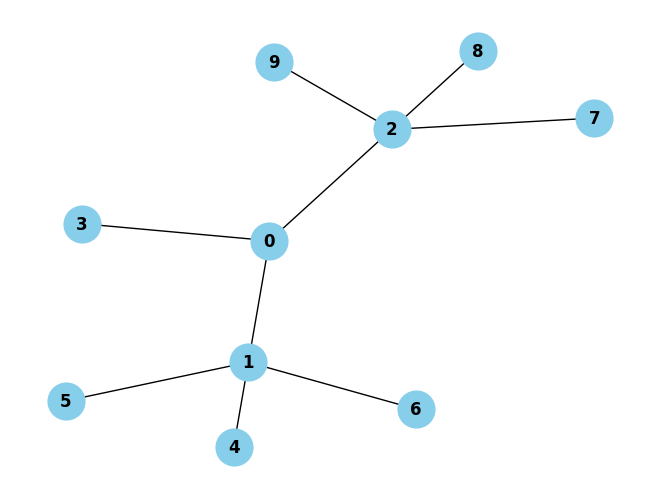

In [37]:
G = generate_tree(10, 3)
nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold')
plt.show()

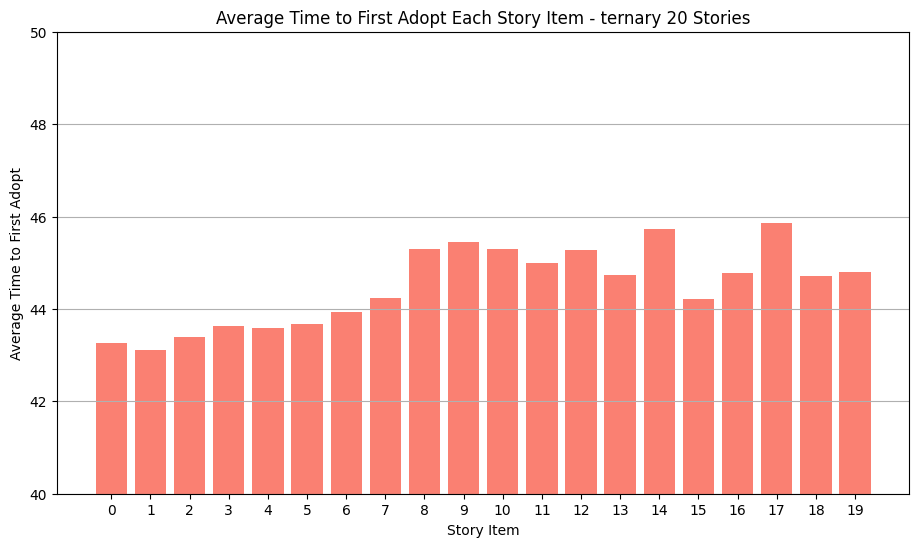

In [39]:
plt.figure(figsize=(11, 6))
plt.bar(preprocessed_ternary_20stories['story_item'], preprocessed_ternary_20stories['timestep'], color='salmon')
plt.xlabel('Story Item')
plt.ylabel('Average Time to First Adopt')
plt.title('Average Time to First Adopt Each Story Item - ternary 20 Stories')
plt.xticks(preprocessed_ternary_20stories['story_item'])
plt.grid(axis='y')
plt.ylim(40, 50)

plt.show()

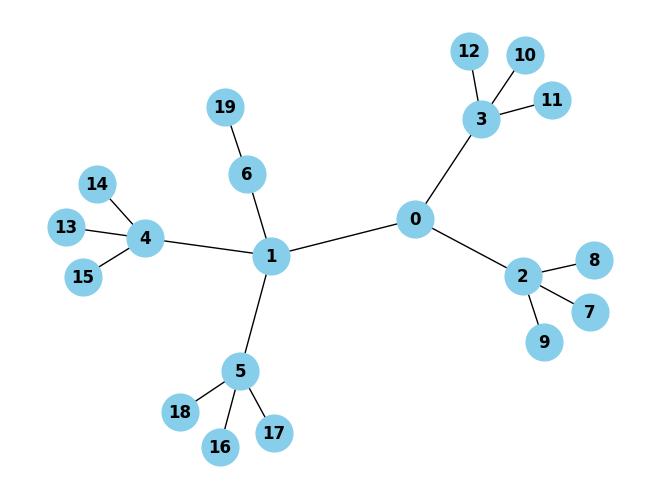

In [40]:
G = generate_tree(20, 3)
nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold')
plt.show()

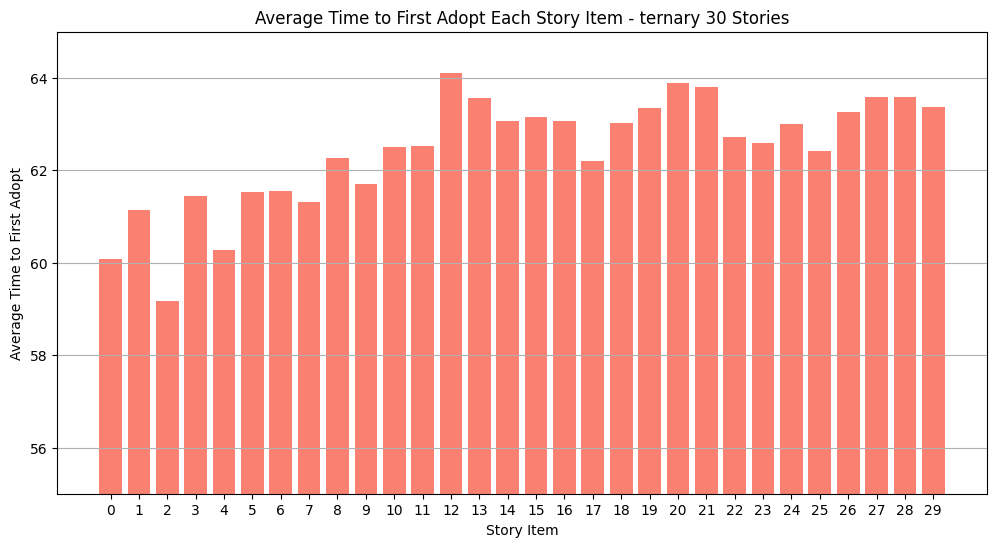

In [42]:
plt.figure(figsize=(12, 6))
plt.bar(preprocessed_ternary_30stories['story_item'], preprocessed_ternary_30stories['timestep'], color='salmon')
plt.xlabel('Story Item')
plt.ylabel('Average Time to First Adopt')
plt.title('Average Time to First Adopt Each Story Item - ternary 30 Stories')
plt.xticks(preprocessed_ternary_30stories['story_item'])
plt.grid(axis='y')
plt.ylim(55, 65)

plt.show()

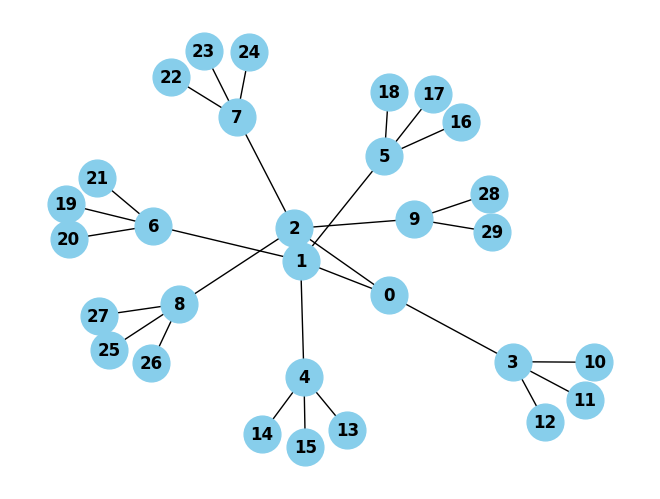

In [43]:
G = generate_tree(30, 3)
nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold')
plt.show()